# Data Exploration Notebook

This notebook explores the raw data from our LLM-based social network simulation.

In [2]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('seaborn')

## Load Data

In [4]:
snapshot = "" # "/snapshots/N" siendo N la snapshot a analizar
# snapshot = "/snapshots/60"
carpeta = "simulation_results_20241001_223902"+snapshot
dir = '../data/'+carpeta

with open(dir+'/network_structure'+'.json', 'r') as f:
    network_data = json.load(f)

with open(dir+'/agent_data'+'.json', 'r') as f:
    agent_data = json.load(f)

print(f"Number of agents: {len(agent_data)}")
print(f"Number of connections: {len(network_data['edges'])}")

Number of agents: 17
Number of connections: 221


## Explore Network Structure

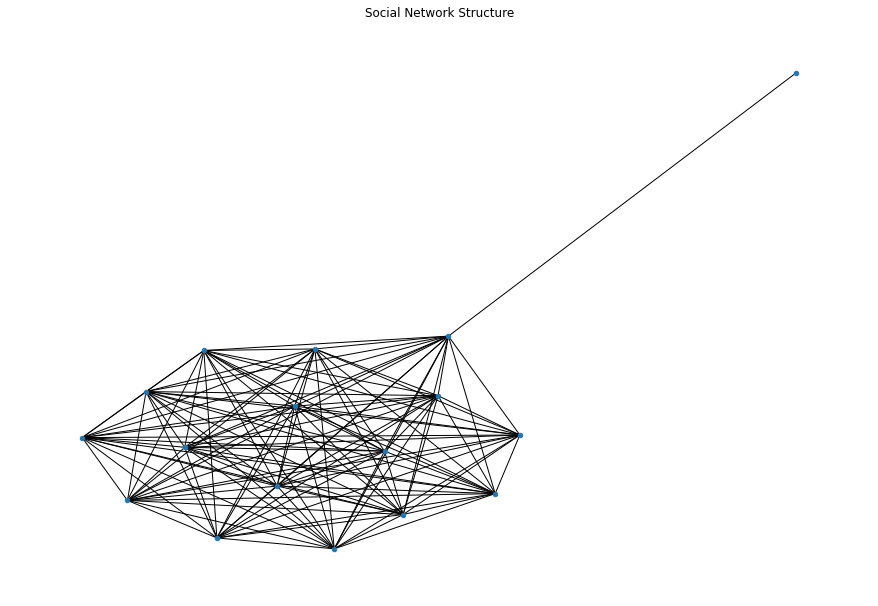

Network density: 0.8824
Average clustering coefficient: 0.9261


In [5]:
G = nx.Graph()
G.add_nodes_from(network_data['nodes'])
G.add_edges_from(network_data['edges'])

plt.figure(figsize=(12, 8))
nx.draw(G, node_size=20, with_labels=False)
plt.title("Social Network Structure")
plt.show()

print(f"Network density: {nx.density(G):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")

## Analyze Agent Types

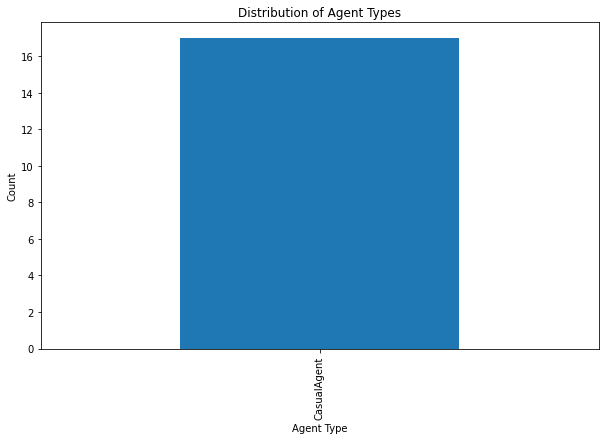

In [6]:
agent_types = [data['type'] for data in agent_data.values()]
type_counts = pd.Series(agent_types).value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title("Distribution of Agent Types")
plt.xlabel("Agent Type")
plt.ylabel("Count")
plt.show()

## Explore Messages

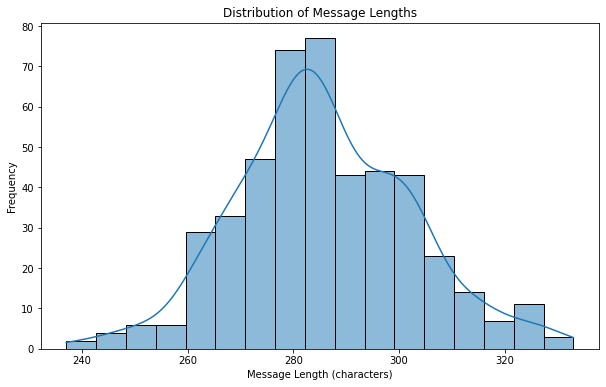

Total messages: 466
Average message length: 285.68 characters


In [7]:
all_messages = [msg for data in agent_data.values() for msg in data['messages']]
message_lengths = [len(msg) for msg in all_messages]

plt.figure(figsize=(10, 6))
sns.histplot(message_lengths, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()

print(f"Total messages: {len(all_messages)}")
print(f"Average message length: {sum(message_lengths) / len(message_lengths):.2f} characters")

## Analyze Agent Personalities

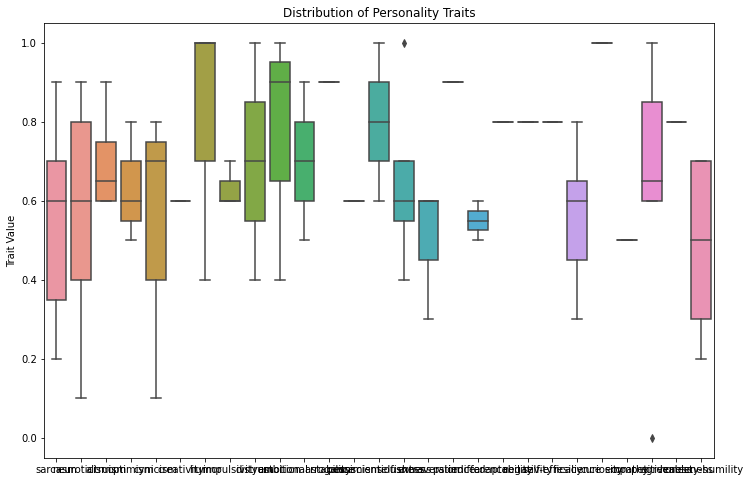

         sarcasm  neuroticism  altruism  optimism  cynicism  creativity  \
count  11.000000     9.000000  4.000000  3.000000  3.000000         1.0   
mean    0.545455     0.566667  0.700000  0.633333  0.533333         0.6   
std     0.262159     0.264575  0.141421  0.152753  0.378594         NaN   
min     0.200000     0.100000  0.600000  0.500000  0.100000         0.6   
25%     0.350000     0.400000  0.600000  0.550000  0.400000         0.6   
50%     0.600000     0.600000  0.650000  0.600000  0.700000         0.6   
75%     0.700000     0.800000  0.750000  0.700000  0.750000         0.6   
max     0.900000     0.900000  0.900000  0.800000  0.800000         0.6   

          humor  impulsivity  distrust  ambition  ...  indifference  \
count  5.000000     3.000000  2.000000  3.000000  ...      2.000000   
mean   0.820000     0.633333  0.700000  0.766667  ...      0.550000   
std    0.268328     0.057735  0.424264  0.321455  ...      0.070711   
min    0.400000     0.600000  0.400000  

In [8]:
personalities = pd.DataFrame([data['personality'] for data in agent_data.values()])

plt.figure(figsize=(12, 8))
sns.boxplot(data=personalities)
plt.title("Distribution of Personality Traits")
plt.ylabel("Trait Value")
plt.show()

print(personalities.describe())